# Método de Newton-Raphson

## Algoritmo

En la Sección  {ref}`sec_dicotomia` mostramos un método numérico para aproximar la raíz de una función que cumple las hipótesis del Teorema de Bolzano. 
Pero el método de dicotomía converge muy lentamente hacia la raíz (necesitaremos muchas iteraciones para llegar a una precisión aceptable). 
Ahora vamos a presentaros otro método numérico que vale para exactamente lo mismo... pero cuya convergencia es muuucho más rápida. Eso sí, necesitaremos
conocer la derivada de la función.


Entonces, consideramos, como en el método de dicotomía, una función $f:[a,b]\rightarrow\mathbb{R}$, continua en $[a,b]$, con $f(a)\,f(b)<0$.

La idea que está detrás de este método es que la función debe parecerse a su recta tangente y, por tanto, la raíz de la función debe estar cerca de la
raíz de la recta tangente. Desarrollando esta idea y dejando iterar el método llegamos a:
* Tomamos un punto $x_{0}\in(a,b)$,
* $x_{1} =$ la raíz de la recta tangente a $f$ en el punto $\left(x_{0}, f\left(x_{0}\right)\right)$, 
* $x_{2} =$ la raíz de la recta tangente a $f$ en el punto $\left(x_{1}, f\left(x_{1}\right)\right)$,
* ...

Gráficamente (puedes jugar con el gráfico, moviendo $x_{0}$, aquí: https://www.desmos.com/calculator/ekj7kblys7?lang=es):

<img src="../../images/cap_der_newton.png" width="500"/>

Desarrollamos esta idea a continuación:
1. Para arrancar el método, tomamos un punto $x_{0}\in(a,b)$. 
2. La **recta tangente a $f$ en $x_{0}$** es $y = f(x_0) + f'(x_0) (x-x_0)$.
   Entonces, el punto de corte de esta recta con el eje de abscisas ($\, y=0\, $) es

    $$
    x_1\, =\, x_0-\frac{f(x_0)}{f'(x_0)}\qquad\text{si }\,f'(x_0)\neq 0.
    $$
3. La **recta tangente a $f$ en $x_{1}$** es $y = f(x_1) + f'(x_1) (x-x_1)$.
   Entonces, el punto de corte de esta recta con el eje de abscisas ($\, y=0\, $) es

    $$
    x_2\, =\, x_1-\frac{f(x_1)}{f'(x_1)}\qquad\text{si }\,f'(x_1)\neq 0.
    $$
4. En general, si conocemos $x_{k}$, el siguiente punto en el algoritmo será:

  $$
  x_{k+1} = x_{k} - \frac{f(x_{k})}{f'(x_{k})}.
  $$


La implementación de este método en `Numpy` es extremadamente sencilla:

In [2]:
import numpy as np
import sympy as sp

x = sp.symbols('x', real=True) # define la variable simbólica x

f_expr = x**3+2*x-2
f_der_expr = sp.diff(f_expr,x)

f = sp.Lambda(x,f_expr)
f_der = sp.Lambda(x,f_der_expr)

N_max = 10
tol = 1.e-9

x_aprox = np.zeros(N_max)
x_aprox[0] = 2

for k in range(1,N_max):
    if f_der(x_aprox[k-1]) == 0: break

    x_aprox[k] = x_aprox[k-1] - f(x_aprox[k-1])/f_der(x_aprox[k-1])

    if ( (k > 0) and (np.abs(x_aprox[k]-x_aprox[k-1]) / np.abs(x_aprox[k]) < tol) ): break

print('Número de iteraciones realizadas: ', k) 
print('Aproximación de la raíz: ', x_aprox[k])
    

Número de iteraciones realizadas:  7
Aproximación de la raíz:  0.7709169970592481


Vamos a representar gráficamente los primeros pasos del algoritmo en este caso:

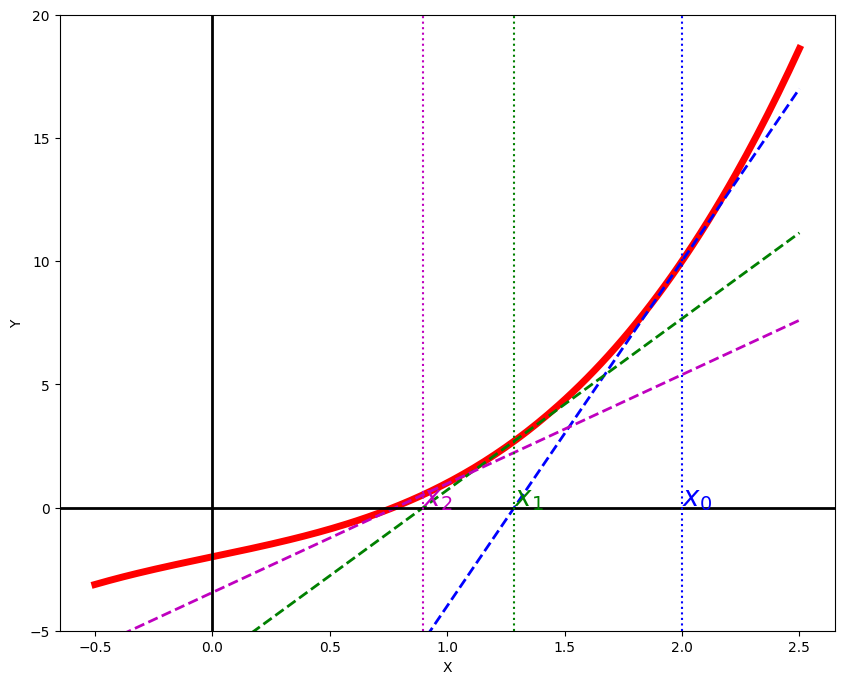

In [3]:
import matplotlib as mp
import matplotlib.pyplot as plt

mp.__version__

%matplotlib inline

xx = np.linspace(-0.5, 2.5, 200)
yy = [f(x) for x in xx]
x0 = x_aprox[0]
x1 = x_aprox[1]
x2 = x_aprox[2]
rt0 = f(x0) + f_der(x0) * (xx-x0) 
rt1 = f(x1) + f_der(x1) * (xx-x1) 
rt2 = f(x2) + f_der(x2) * (xx-x2) 

fig = plt.figure(figsize = (10,8))
plt.ylim(-5,20)

plt.plot(xx, yy, c='r', lw='5', label = '$f$')
plt.plot(xx, rt0, c='b', ls='--', lw='2', label = 'RT$_{x_{0}}$')
plt.plot(xx, rt1, c='g', ls='--', lw='2', label = 'RT$_{x_{1}}$')
plt.plot(xx, rt2, c='m', ls='--', lw='2', label = 'RT$_{x_{2}}$')
plt.ylabel('Y', fontsize=10)
plt.xlabel('X', fontsize=10)
plt.axhline(y=0., c='black', lw='2')
plt.axvline(x=0., c='black', lw='2')

plt.axvline(x=x0, c='b', ls=':')
plt.text(x0, 0.1, '$x_{0}$', c='b', fontsize=20)
plt.axvline(x=x1, c='g', ls=':')
plt.text(x1, 0.1, '$x_{1}$', c='g', fontsize=20)
plt.axvline(x=x2, c='m', ls=':')
plt.text(x2, 0.1, '$x_{2}$', c='m', fontsize=20)

plt.show()

## Links para ampliar

En el caso de que no nos hayáis entendido, o queráis ampliar vuestro conocimiento, podéis mirar los siguientes links:

* https://es.wikipedia.org/wiki/M%C3%A9todo_de_Newton
* https://www.unioviedo.es/compnum/laboratorios_py/Ec_no_lin/Ec_no_lin.html#raiz
* https://estadistica-dma.ulpgc.es/FCC/05-3-Raices-de-Ecuaciones-2.html
* https://www.geogebra.org/m/XCrwWHzy

## Ejercicio para que hagáis

Utiliza el método de dicotomía para aproximar la raíz de la función $f(x) = \ln\left(\tan(x)\right)$ empezando con $x_{0}=1.5$.

In [3]:
# ESCRIBE AQUÍ TU CÓDIGO

## Ejercicios para practicar un poco más

Para practicar un poco sobre lo que se explica en este tema os recomendamos los siguientes ejercicios del todavía maravilloso blog https://existelimite.blogspot.com/, aunque es posible que, al igual que en dicotomía, en ellos encuentres algunas cosas (sobre la unicidad de raíces con el Teorema de Rolle, sobre todo), que aún no os hayamos contado:

* https://existelimite.blogspot.com/2013/10/continuidad-unicidad-de-raiz-y.html
* https://existelimite.blogspot.com/2013/01/existe-raiz-es-unica-y-la-aproximamos.html